主成分分析法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3d
import math
import random
import os
import scipy
from matplotlib.pyplot import imread
from PIL import Image
np.random.seed(13579201)

我们提供三个包含行人图片的文件夹，它们是'train', 'gallery', and 'val_query'。在'train'文件夹中包含199张图片，用来计算特征行人图片和建立投影函数。'Gallery'包含15个行人的90张图片。 

'Val_query'是三张行人的图片。如果两张图片的文件名前四位相同，那它们属于同一个行人。

(24576, 199)


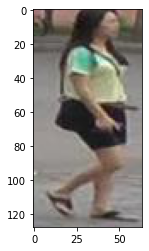

In [2]:
width = 64
height = 128
dimension = (height, width, 3)
images = []
filename = []
for file in os.listdir("./train"):
    if file.endswith(".jpg"):
        im = imread("./train/" + file)
        im = im.flatten() # flatten im into a vector
        images.append(im) 
        filename.append(file)
A_pp = np.stack(images).T # build a matrix where each column is a flattened image
print(A_pp.shape)
plt.imshow(A_pp[:, 0].reshape(dimension))
plt.show()

1.1

我们定义$A\_{pp} \in \mathbb{R}^{D \times N}$作为储存数据的矩阵，该矩阵的每一列都是一个数据样本，每一列是这些数据样本的特征。

1.1中需要完成预处理函数：$preprocess(A\_{pp}) = A, Q\_norms, A\_means$

$$Q_{i,:} = A\_{pp}_{i,:} - \mu_i$$

...其中 $\mu_i = \frac{1}{m}\sum_j A\_{pp}_{ij}$ .

$$A_{i,:} = \frac{Q_{i,:}}{||Q_{i,:}||_\infty }$$


$A \in \mathbb{R}^{D \times N}$

$Q_{i,:}$ 是$Q$的第i行

$A_{i,:}$ 是$A$的第i行

$||Q_{i,:}||_\infty$ 是 $Q_{i,:}$的无穷范式
如果范式值为零，那么我们除以1

In [ ]:
def preprocess(A_pp):
    

A, Q_norms, A_means = preprocess(A_pp)
print(A)
print(Q_norms)
print(A_means.shape)

$A \in \mathbb{R}^{D \times N}$的每一列是一个样本数据，每一行是这些样本数据的特征。我们将用它来处理上述的行人图片。矩阵的每一列都是一个行人的图片，我们将一个64列*128行个包含3种颜色的像素转化为一个长度为24576的列向量。

因此，D为24576，N为199。（上面的代码已经实现了转换，我们不需要你去实现）

我们的目标是把每一张图片表示为一些其他图片的线性组合，这些其他图片就是特征行人图片，这些特征行人图片都是24576*1的列向量，它们是$AA^T$矩阵的特征向量

1.2

使用$np.linalg.eig()$以及上面定义和你完成的函数实现$eigen\_person(A) = F, D$

$D$ 是特征值的矩阵

$F$ 是特征行人图片

要求：
请先预处理数据
使用np.cov()，np.linalg.eig()
F的每一列都必须是单位向量
在合理的时间和空间内处理这些数据，太高的时间复杂度和空间复杂度是不可接受的


In [ ]:
def eigen_ped(A):
    B = A@A.T
    
    

#For the purposes of doing this assignment, this code isn't really here. Pretend it's engraved in rock.
F, D = eigen_ped(A)
F_real = np.real(F)
print('Orthogonality Check (should be close to 0): ', F_real[:, 0].T@F_real[:, 1])
print('Unit Vector Check: ', math.isclose(np.linalg.norm(F_real[:,0]), 1))
print(F.shape) # It should be (24576, 199)
print(D.shape) # It should be (24576)

# The visulisation of an Eigen Pedestrain should **look like** a pedestrain.
print('Visualise an Eigen Pedestrain:')
ep = np.rint((F[:,0] * Q_norms + A_means).reshape(dimension)).astype(int)
plt.imshow(ep)
plt.show()

1.3
完成以下函数：
$$reduce\_dimensionality(image\_vector, k, F, D, A\_means, Q\_norms) = compressed\_image, p$$

这个函数将图片向量映射为k个特征行人，这k个特征行人和最大的k个特征向量相对应。函数返回压缩矩阵 $compressed\_image$ 和 p，p是被这k个特征行人捕捉到的方差的百分比。


$compressed\_image \in \mathbb{R}^{N}$，在下面的例子中，k为80，所以compressed matrix有80个非零元素和N-80个为零的元素
使用np.eig()
使用array=img时，array会被转换为图片，我们应该使用array = Img.copy()

In [ ]:
def reduce_dimensionality(image_vector, k, F, D, A_means, Q_norms):
    
    

# Display Code. Leave it alooooooooooone.
Idx = 0
compressed_image, p = reduce_dimensionality(A_pp[:, Idx], 80, F, D, A_means, Q_norms)
print(compressed_image.shape) # should be (199,)
print('Variance Captured:', int(p * 100), '%')

1.4
我们已经得到$compressed\_image$ 和 $F$ 了，我们可以能够把一张图片表示为特征图片的线性组合了。完成以下函数：

$$reconstruct\_image(compressed\_image, F, Q\_norms, A\_means) = R$$

R是重新构造后的图片，$R \in \mathbb{R}^{128 \times 64 \times 3}$

In [ ]:
def reconstruct_image(compressed_image, F, Q_norms, A_means):
    # YOUR CODE HERE

#Display Code. Leave it alooooooooooone.
R_c = reconstruct_image(compressed_image, F, Q_norms, A_means)
print('Compressed Image: ')
plt.imshow(R_c)
plt.show()
Img = A[:, Idx]
R_o = A_pp[:, Idx].reshape(dimension)
print('Original Image')
plt.imshow(R_o)
plt.show()

# Two images should look similar. The compressed image may be a little more blurry.

1.5完成以下函数：

$$the\_nearest\_image(query\_image,gallery\_images, k, F, D, A\_means, Q\_norms) = index\_of\_the\_nearest\_image$$

使用1.3中定义的函数把图片映射为k个特征行人，然后返回90张图片中与之最为接近的

$query\_image$ and $gallery\_images$需要预处理，首先你需要计算每个图片的压缩矩阵，然后使用欧氏距离去比较它们是否接近，取其中最接近的图片

In [ ]:
def the_nearest_image(query_image, gallery_images, k, F, D, A_means, Q_norms):
    #CODE HERE


# Display Code. Leave it alooooooooooone.
# read a query image
query_image = imread("./val_query/0227_c2s1_046476_01.jpg")
query_image = query_image.flatten()

# read gallery images
gallery_images = []
original_gallery_images = []
filename = []
for file in os.listdir("./gallery"):
    if file.endswith(".jpg"):
        im = imread("./gallery/" + file)
        original_gallery_images.append(im)
        im = im.flatten() # flatten im into a vector
        gallery_images.append(im) 
        filename.append(file)
        
original_gallery_images = np.array(original_gallery_images)
gallery_images = np.stack(gallery_images).T

idx = the_nearest_image(query_image, gallery_images, 80, F, D, A_means, Q_norms)
plt.imshow(query_image.reshape(dimension))
plt.show()
plt.imshow(gallery_images[:, idx].reshape(dimension))
plt.show()